<a href="https://colab.research.google.com/github/nik-hil-24/DS403-Introduction-To-Statistical-Learning/blob/main/Assignment-3/init0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split

In [4]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Filter Warnings
import warnings
warnings.filterwarnings('ignore')

In [13]:
# Set Style
sns.set(style='darkgrid')

# **Task 1**

**I. Model**

In [52]:
# Linear Regression Model With In-Built L2-penalty using Matrix Form
class LinearRegression:
    def __init__(self, X_train, target, lambdaRidge=0):
        """
        LinearRegression: Linear Regression Model
        X_train (DataFrame): Independent Variables
        target (DataFrame): Dependent Variable
        lambdaRidge (float): L2-penalty Coefficient
        """

        self.target = target
        self.lambdaRidge = lambdaRidge
        self.rows, _ = X_train.shape

        # X is [feature-1,feature-2,...] we want [1,feature-1,feature-2,...] to perform matrix dot-product
        ones = np.ones((self.rows,1))
        self.mat_X = np.concatenate((ones, X_train), axis = 1)

        # Weights Variable
        self.cols = self.mat_X.shape[1]
        self.theta = np.zeros((self.cols,1))

    def fit(self):
        I = np.identity(self.cols)
        self.theta = np.dot(np.linalg.inv(np.dot(self.mat_X.T,self.mat_X)+self.lambdaRidge*I),
                            np.dot(self.mat_X.T,self.target))

    def calcCost(self, input, output):
        rows, _ = input.shape
        ones = np.ones((rows,1))
        mat_X = np.concatenate((ones, input), axis = 1)
        tempval = np.dot(mat_X, self.theta) - output
        return np.sum(np.power(tempval, 2))/(2*rows) + self.lambdaRidge*np.sum(np.power(self.theta,2))

**II. Plots**

In [6]:
# Read Dataset
df = pd.read_csv('/content/drive/MyDrive/ISL Assgn-3/advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [7]:
# Split Dataset
X = df.drop(['Sales'], axis = 'columns')
y = df[['Sales']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

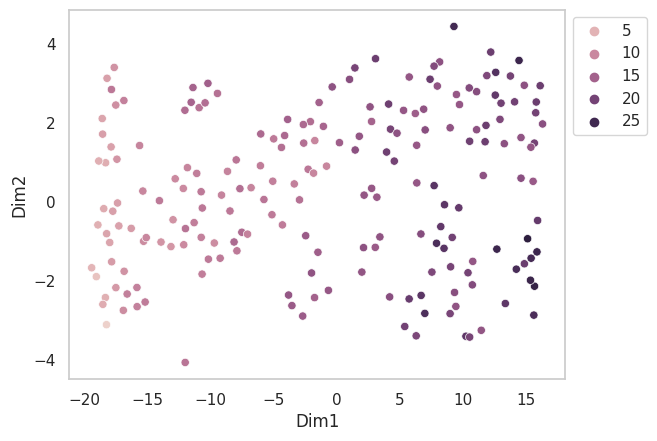

In [29]:
# TSNE in 2-D
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)
X_tsne_data = np.vstack((X_tsne.T, df['Sales'])).T
df_tsne = pd.DataFrame(X_tsne_data, columns=['Dim1','Dim2','Target'])

# Plot
sns.scatterplot(data=df_tsne, hue='Target', x='Dim1', y='Dim2')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show();

**III. Linear Regression with and without L2-penalty**

In [53]:
# Vanilla Linear Reg
simpleLinearReg = LinearRegression(X_train,y_train)
simpleLinearReg.fit()

# Ridge Reg
ridgeReg = LinearRegression(X_train,y_train,lambdaRidge=0.01)
ridgeReg.fit()

In [56]:
# Losses
linearRegTrainLoss = simpleLinearReg.calcCost(X_train,y_train)[0]
linearRegTestLoss = simpleLinearReg.calcCost(X_test,y_test)[0]

ridgeRegTrainLoss = ridgeReg.calcCost(X_train,y_train)[0]
ridgeRegTestLoss = ridgeReg.calcCost(X_test,y_test)[0]

print(f"For Simple Linear Regression Model, the train loss and test loss are {round(linearRegTrainLoss,3)} and {round(linearRegTestLoss,3)} respectively.")
print(f"For Ridge Regression Model, the train loss and test loss are {round(ridgeRegTrainLoss,3)} and {round(ridgeRegTestLoss,3)} respectively.")

For Simple Linear Regression Model, the train loss and test loss are 1.341 and 1.45 respectively.
For Ridge Regression Model, the train loss and test loss are 1.54 and 1.649 respectively.


**IV. Experiment with lambda val**

In [99]:
# Values Of Lambda For Ridge Regression
lambdaLog = np.linspace(-3,3.2,110)
lambdaVals = np.exp(lambdaLog)

trainLoss = []
testLoss = []

for val in lambdaVals:
    # Train Model
    model = LinearRegression(X_train,y_train,lambdaRidge=val)
    model.fit()
    # Calc Loss
    l1 = model.calcCost(X_train,y_train)[0]
    l2 = model.calcCost(X_test,y_test)[0]
    # Append To List
    trainLoss.append(l1)
    testLoss.append(l2)

Text(0, 0.5, 'Test Error')

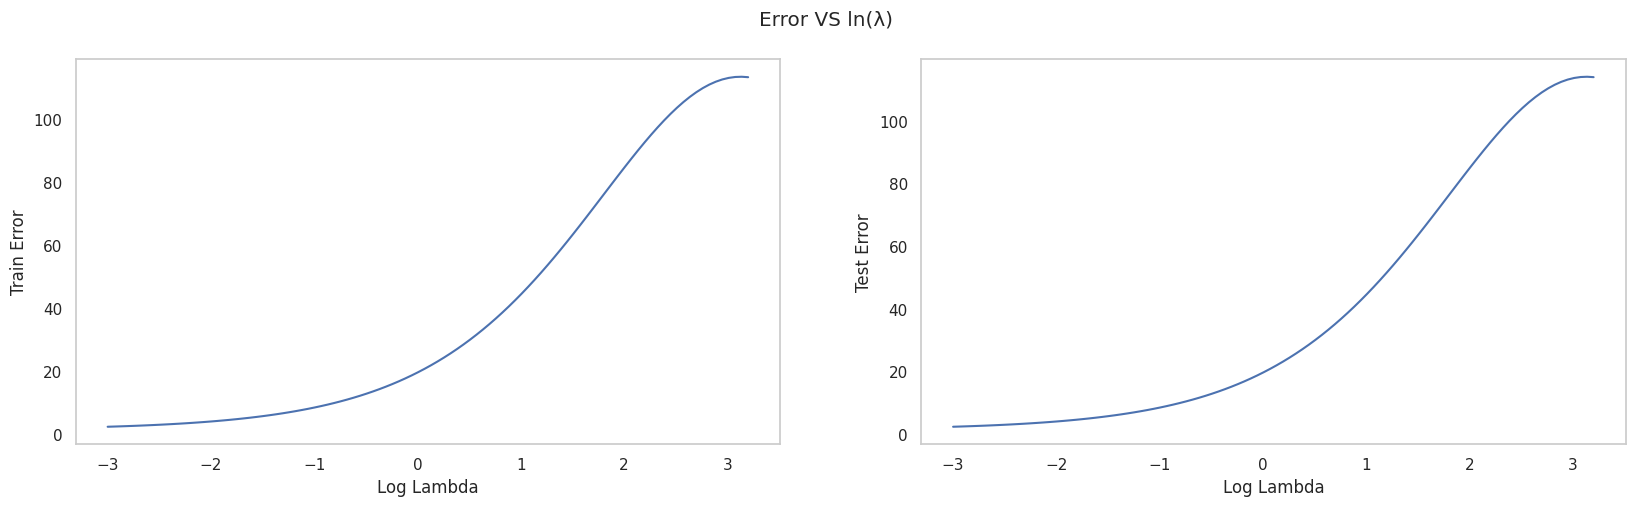

In [101]:
# Plot
fig, ax = plt.subplots(1,2, figsize=(20,5))
fig.suptitle('Error VS ln(λ)')

ax[0].plot(lambdaLog, trainLoss)
ax[0].set_xlabel("Log Lambda")
ax[0].set_ylabel("Train Error")

ax[1].plot(lambdaLog, testLoss)
ax[1].set_xlabel("Log Lambda")
ax[1].set_ylabel("Test Error");